## 3(2) Feature_Transformation&Selection_1103
221103에 생성한 Feature를 변환, 선택하는 파일이다.

### Import

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
import warnings ; warnings.filterwarnings('ignore')

### Read Data

In [4]:
train = pd.read_csv('../data/feature/20221103_train.csv')
test = pd.read_csv('../data/feature/20221103_test.csv')
train_raw, test_raw = train.copy(), test.copy()

In [5]:
# Feature가 아닌 변수를 제거한다.
del train['id'], test['id']

# X_train, y_train, X_test를 지정한다
y_train = train['target'] ; del train['target']
X_train, X_test = train, test
print('X_train.shape:', X_train.shape, 'X_test.shape', X_test.shape)

X_train.shape: (4701217, 49) X_test.shape (291241, 49)


### $\blacktriangleright$ Feature Transform

KeyboardInterrupt: 

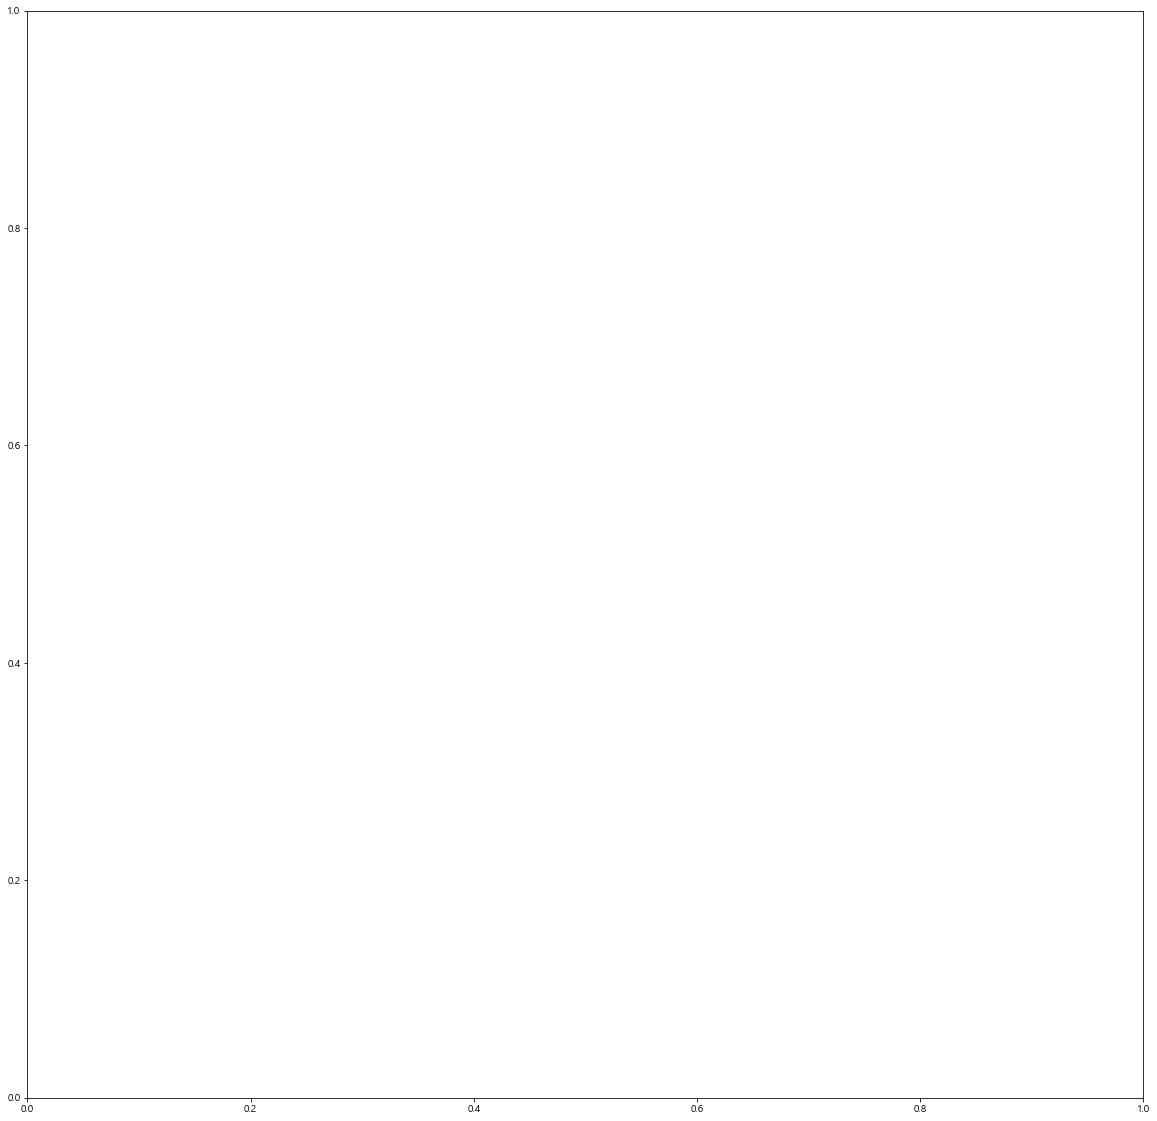

In [5]:
X_train.boxplot(figsize=(20,20))

In [ ]:
# scaler 적용 등 고민해보기

### $\blacktriangleright$ Feature Selection

- Split Data

In [6]:
train_X, val_X, train_y, val_y = train_test_split(X_train, y_train, test_size=0.3, random_state=2022)

- Train Base Model

In [7]:
model = LGBMRegressor(n_estimators=1000, metric= 'mae', random_state = 2022)

In [8]:
model.fit(train_X, train_y)

LGBMRegressor(metric='mae', n_estimators=1000, random_state=2022)

- Adjust Features

In [9]:
# 전체 50개 사용:  2.994477866931695
# 상위 36개 사용:  2.994770730280468(stop)

print(f'상위 {X_train.shape[1]}개 사용: ',mean_absolute_error(val_y, model.predict(val_X)))

상위 49개 사용:  3.2836003251321455


In [10]:
# Feature Importance 확인
FI = pd.DataFrame({'Feature_Importances':model.feature_importances_})
display(FI.value_counts().sort_index())

Feature_Importances
0                      10
2                       2
4                       1
5                       1
6                       1
9                       1
14                      1
17                      2
28                      1
34                      1
35                      1
43                      1
60                      1
64                      1
100                     1
116                     1
121                     1
127                     1
266                     1
297                     1
556                     1
632                     1
646                     1
733                     1
743                     1
796                     1
842                     1
881                     1
945                     1
1291                    1
1458                    1
1554                    1
2242                    1
2282                    1
2368                    1
2450                    1
2729                    1
5485              

In [12]:
# redefine features
# Log loss가 올라가는 importance 이면 그 사이값 재탐색 후 결정한다.
# limit = round(FI.value_counts().sort_index().index[1][0], 6)
# redefine_1 = FI.query('Feature_Importances > @limit').index

# X_train = X_train.iloc[:, redefine_1]
# X_test = X_test.iloc[:, redefine_1]

### Save Data

In [ ]:
# 원본 그대로 사용한다.